In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##Uploading the Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MawaJunnatul/Machine-Learning-Work-by-Mawa/main/Expanded_data_with_more_features.csv")

In [ ]:
df.head(15)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


###DROP unnamed column

In [ ]:
df= df.drop(['Unnamed: 0'], axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df["WklyStudyHours"]= df["WklyStudyHours"].str.replace("10-May", "5-10")
df.head(12)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


##Gender Distribution(Seaborn)

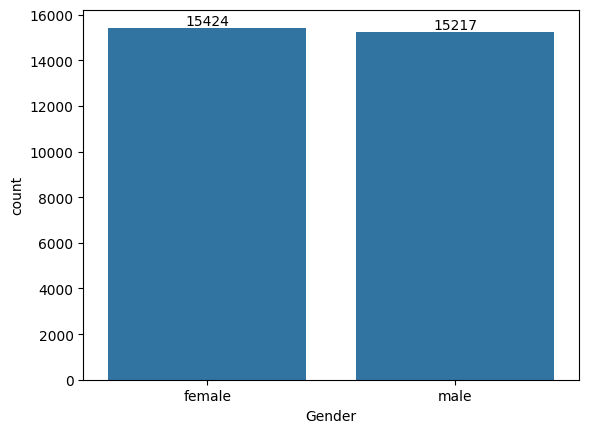

<Figure size 400x400 with 0 Axes>

In [ ]:
ax= sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.figure(figsize=(4,4))

plt.show()

# **How Parents education is impacting on Students Results**

In [ ]:
gb = df.groupby(['ParentEduc']).agg({"MathScore": "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


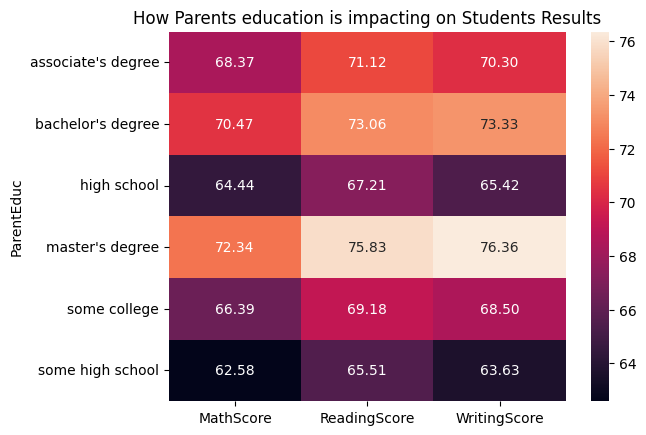

In [ ]:
sns.heatmap(gb, annot=True, fmt='.2f')
plt.title('How Parents education is impacting on Students Results')
plt.show()

### How Parent Marital status is impacting on Student Results

In [ ]:
gb_new = df.groupby(['ParentMaritalStatus']).agg({"MathScore": "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb_new

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


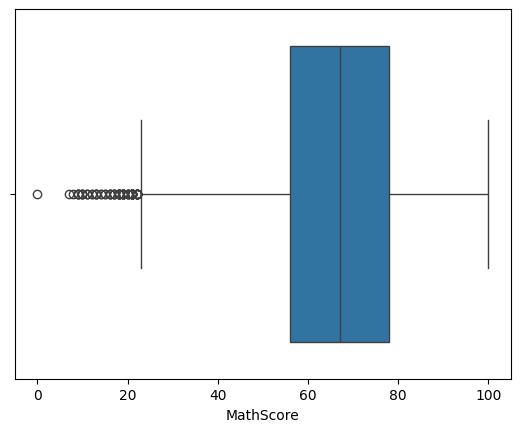

In [ ]:
sns.boxplot(x='MathScore', data=df)
plt.show()

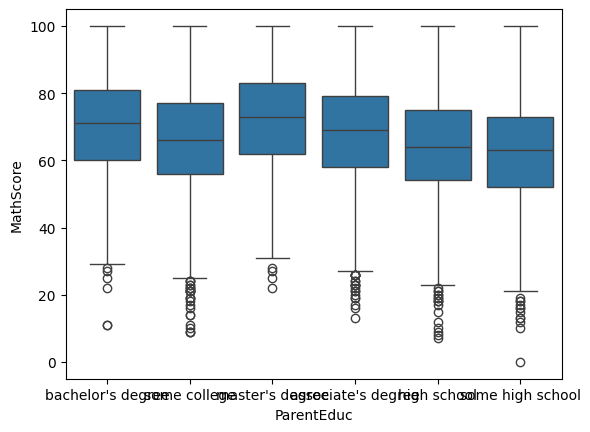

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='ParentEduc', y = 'MathScore',data=df)
plt.figure(figsize=(10,10))
plt.show()

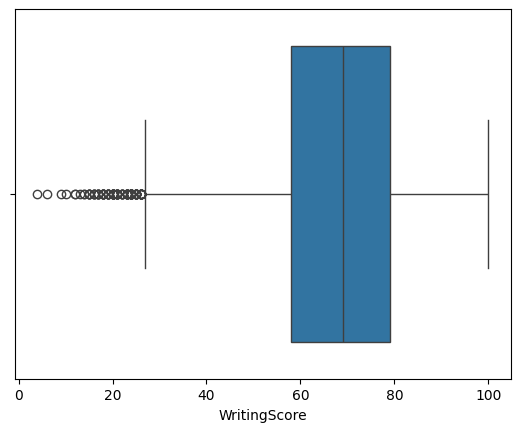

In [ ]:
sns.boxplot(x='WritingScore', data=df)
plt.show()

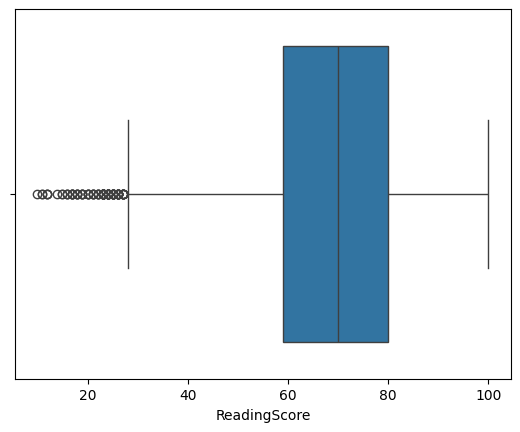

In [ ]:
sns.boxplot(x='ReadingScore', data=df)
plt.show()

##Distribution Of Ethinic Groups

In [ ]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [ ]:
groupA = df[df['EthnicGroup'] == 'Group A']
groupB = df[df['EthnicGroup'] == 'Group B']
groupC = df[df['EthnicGroup'] == 'Group C']
groupD = df[df['EthnicGroup'] == 'Group D']

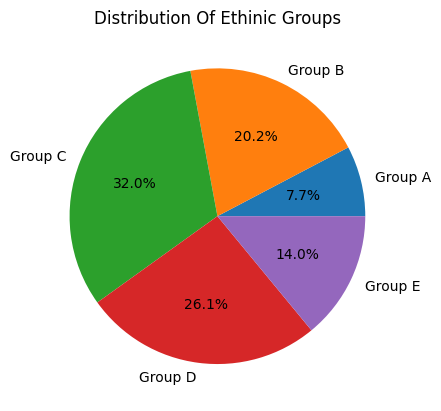

In [ ]:
groupA = df.loc[df['EthnicGroup'] == 'group A'].count()
groupB = df.loc[df['EthnicGroup'] == 'group B'].count()
groupC = df.loc[df['EthnicGroup'] == 'group C'].count()
groupD = df.loc[df['EthnicGroup'] == 'group D'].count()
groupE = df.loc[df['EthnicGroup'] == 'group E'].count()
new_list = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
plt.title('Distribution Of Ethinic Groups')
plt.pie(new_list, labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'], autopct='%1.1f%%')
plt.show()

In [ ]:
groupB = df.loc[df['EthnicGroup'] == 'group B']
print(groupB)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2      female     group B     master's degree      standard       none   
5      female     group B  associate's degree      standard       none   
6      female     group B        some college      standard  completed   
7        male     group B        some college  free/reduced       none   
9      female     group B         high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30623  female     group B                 NaN      standard  completed   
30624  female     group B   bachelor's degree      standard  completed   
30628  female     group B                 NaN  free/reduced       none   
30630    male     group B  associate's degree  free/reduced       none   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2                  single     sometimes    

In [ ]:
print(new_list)

[2219, 5826, 9212, 7503, 4041]


<Figure size 400x400 with 0 Axes>

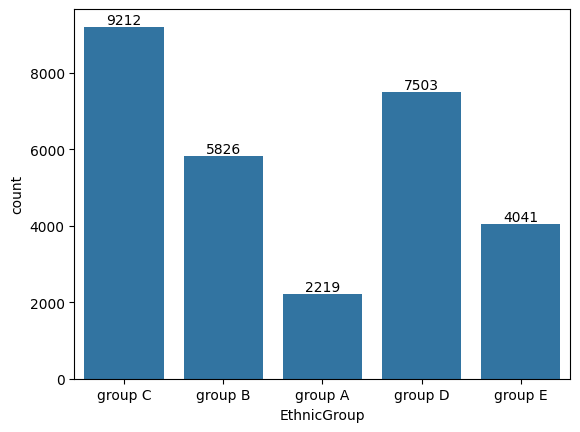

<Figure size 400x400 with 0 Axes>

In [ ]:
ax= sns.countplot(x='EthnicGroup', data=df)
ax.bar_label(ax.containers[0])
plt.figure(figsize=(4,4))

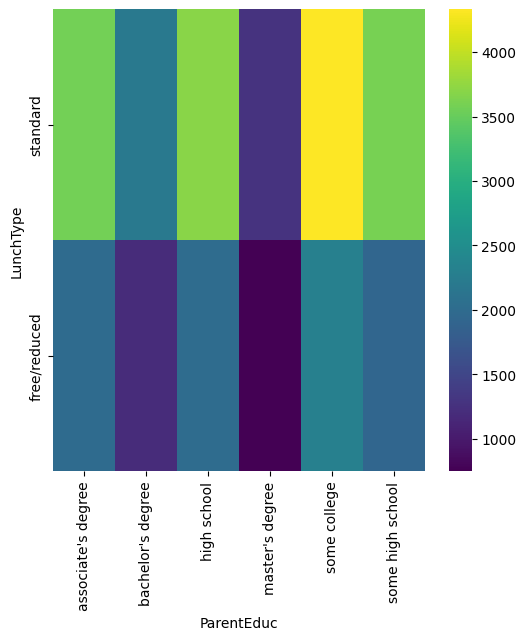

In [ ]:
from matplotlib import pyplot as plt
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['LunchType'].value_counts()
    for x_label, grp in df.groupby('ParentEduc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ParentEduc')
_ = plt.ylabel('LunchType')